In [1]:
import numpy as np
import copy
import cv2
import Operator as op
import MPS
from scipy.linalg import expm

In [8]:
n = 4
x = np.random.rand(n, n)
lm, u = np.linalg.eig(x)
y = expm(x)
y.dot(u[:, 0]) - np.exp(lm[0]) * u[:, 0]

array([3.55271368e-15+0.j, 2.22044605e-15+0.j, 3.99680289e-15+0.j,
       0.00000000e+00+0.j])

In [6]:
H = op.heisenberg_hamilt([1, 1, 1], [0, 0, 0])

In [7]:
np.eye(5).shape

(5, 5)

In [2]:
x = MPS.mps(d = 4, chi = 10, length = 4)
print(x.virtdim)
for n in range(0,x.length):
    print(x.tensors[n].shape,end=' ')
x.orth_right2left(3, cut_dim = 6)
print('\n',x.virtdim)
for n in range(0,x.length):
    print(x.tensors[n].shape,end=' ')
x.orth_right2left(2, cut_dim = 6)
print('\n',x.virtdim)
for n in range(0,x.length):
    print(x.tensors[n].shape,end=' ')
x.orth_right2left(1, cut_dim = 6)
print('\n',x.virtdim)
for n in range(0,x.length):
    print(x.tensors[n].shape,end=' ')

[10, 10, 10]
(4, 10) (10, 4, 10) (10, 4, 10) (10, 4) 
 [10, 10, 4]
(4, 10) (10, 4, 10) (10, 4, 4) (4, 4) 
 [10, 6, 4]
(4, 10) (10, 4, 6) (6, 4, 4) (4, 4) 
 [6, 6, 4]
(4, 6) (6, 4, 6) (6, 4, 4) (4, 4) 

In [54]:
tensor = np.random.randn(4,10)
u, lm, v = np.linalg.svd(tensor, full_matrices = False)
print(u.shape,lm.shape,v.shape)
print(lm)

(4, 4) (4,) (4, 10)
[4.28011706 4.0664482  1.99549077 1.38439236]


In [55]:
r = np.diag(lm[:cut_dim]).dot(v[:cut_dim, :])
print(r.shape)

(4, 10)


In [35]:

tensor0 = x.mps2tensor()
x.center_orth(center = 0, cut_dim = -1)
tensor = x.get_tensor(1)
tensor = np.tensordot(tensor,tensor,[[1],[1]])
print(tensor)
err = np.linalg.norm(tensor - np.eye(4))
print(err)


[[ 1.00000000e+00  2.15041635e-17  5.37260171e-17 -2.51014050e-16]
 [ 2.15041635e-17  1.00000000e+00  5.45546771e-16  3.23957377e-16]
 [ 5.37260171e-17  5.45546771e-16  1.00000000e+00 -4.30917071e-16]
 [-2.51014050e-16  3.23957377e-16 -4.30917071e-16  1.00000000e+00]]
1.3516368858264404e-15


In [44]:
y = MatrixProductState.OBCMPS(d = 2, chi = 10, length = 10)
tensor0 = y.full_tensor()
y.center_orthogonalization(5, way = 'svd', dc = 8, normalize = False)
tensor = y.full_tensor()
tensor = tensor/np.linalg.norm(tensor)
tensor0 = tensor0/np.linalg.norm(tensor0)
err = np.linalg.norm(tensor0 - tensor)
print(err)

0.08169656741780812


In [45]:
x = MPS.mps(d = 2, chi = 10, length = 10)
tensor0 = x.mps2tensor()
x.center_orth(5, cut_dim = 8)
tensor = x.mps2tensor()
tensor = tensor/np.linalg.norm(tensor)
tensor0 = tensor0/np.linalg.norm(tensor0)
err = np.linalg.norm(tensor0 - tensor)
print(err)
x.center_orth(6, cut_dim = 8)
tensor0 = x.mps2tensor()
tensor = tensor/np.linalg.norm(tensor)
tensor0 = tensor0/np.linalg.norm(tensor0)
err = np.linalg.norm(tensor0 - tensor)
print(err)

0.25929050308523316
8.765864337006104e-16


In [42]:
x = MPS.mps(d = 4, chi = 10, length = 4)
tensor0 = x.mps2tensor()
x.center_orth(center = 1, cut_dim = 6)
tensor = x.get_tensor(0)
tensor = np.tensordot(tensor,tensor,[[0],[0]])
print(tensor)

[[ 1.00000000e+00 -2.69715660e-17  3.00288612e-16  8.23604150e-17]
 [-2.69715660e-17  1.00000000e+00 -3.12383344e-16  9.92807591e-17]
 [ 3.00288612e-16 -3.12383344e-16  1.00000000e+00 -2.50022382e-16]
 [ 8.23604150e-17  9.92807591e-17 -2.50022382e-16  1.00000000e+00]]


In [66]:
x = MPS.mps(d = 4, chi = 10, length = 4)
x.center_orth(center = x.length-1, cut_dim = 6)
for n in range(0,x.length):
    print(x.tensors[n].shape)

(4, 4)
(4, 4, 6)
(6, 4, 6)
(6, 4)


In [8]:
m = MPS.mps(2,2,3)
# print(m.tensors)
M = m.mps2tensor()
print(M)

[[[ 0.46020161 -1.50716596]
  [ 2.91081436  2.61212477]]

 [[ 0.73817045  1.27364669]
  [-3.33875871 -1.14203851]]]


In [9]:
print(M.reshape((-1,)))

[ 0.46020161 -1.50716596  2.91081436  2.61212477  0.73817045  1.27364669
 -3.33875871 -1.14203851]


In [5]:
str = 'SVD'
str = str.lower()
print(str)

svd


In [8]:
str=='a' or str=='b'

False

Shape of the image data = (294, 1151, 3)


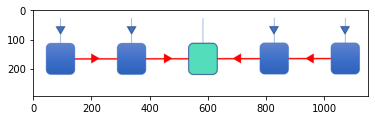

In [8]:
img = cv2.imread('./imgs/center_orth.png')  # 读取RGB图片
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [27]:
for n in range(1, 0, -1):
    print(n,' ', end='')

1  